## Tutorial for CSVtoRDF

https://stackoverflow.com/questions/43524943/creating-rdf-file-using-csv-file-as-input

In [1]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF, XSD #most common namespaces
import urllib.parse #for parsing strings to URI's
import pandas as pd

In [5]:
url='https://raw.githubusercontent.com/KRontheWeb/csv2rdf-tutorial/master/example.csv'
df=pd.read_csv(url,sep=";",quotechar='"')

In [7]:
g = Graph()
ppl = Namespace('http://example.com/people/')
loc = Namespace('http://mylocations.org/addresses/')
schema = Namespace('http://schema.org/')

In [8]:
for index, row in df.iterrows():
    g.add((URIRef(ppl+row['Name']), RDF.type, FOAF.Person))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
    g.add((URIRef(ppl+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
    g.add((URIRef(loc+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))

In [10]:
print(g.serialize(format='turtle'))
g.serialize('example.ttl',format='turtle')

@prefix ns1: <http://xmlns.com/foaf/0.1/> .
@prefix ns2: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.com/people/Jake> a ns1:Person ;
    ns2:address "12E Street 98"^^xsd:string ;
    ns2:name "Jake"^^xsd:string ;
    ns1:age 42 .

<http://example.com/people/Jenny> a ns1:Person ;
    ns2:address "Leidseplein 2"^^xsd:string ;
    ns2:name "Jenny"^^xsd:string ;
    ns1:age 12 .

<http://example.com/people/Jill> a ns1:Person ;
    ns2:address "52W Street 5"^^xsd:string ;
    ns2:name "Jill"^^xsd:string ;
    ns1:age 28 .

<http://example.com/people/John> a ns1:Person ;
    ns2:address "Dam 52"^^xsd:string ;
    ns2:name "John"^^xsd:string ;
    ns1:age 32 .

<http://mylocations.org/addresses/12E%20Street%2098> ns2:name "12E Street 98"^^xsd:string .

<http://mylocations.org/addresses/52W%20Street%205> ns2:name "52W Street 5"^^xsd:string .

<http://mylocations.org/addresses/Dam%2052> ns2:name "Dam 52"^^xsd:string .

<http://mylocations.org/addre

<Graph identifier=N42150f30038f4cdaa20c991a4360946a (<class 'rdflib.graph.Graph'>)>

In [1]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
import urllib.parse #for parsing strings to URI's
import pandas as pd
from pathlib import Path

main_path = Path().absolute().parent
data_path = main_path / 'data'

In [137]:
# full
df = pd.read_csv(data_path / 'AccountRDF.csv', encoding='utf-8')
ns_acc = Namespace('http://fsqa.com/acc#')
namespace_dict = {
    'acc': ns_acc, 'time': TIME, 'rdf': RDF, 'rdfs': RDFS, 'owl': OWL, None: ''
}
g = Graph()
g.bind('rdf', RDF)
g.bind('time', TIME)
g.bind('owl', OWL)
g.bind('acc', ns_acc, override=True)
for index, row in df.iterrows():
    s_ns, s = row['subject'].split(':')
    p_ns, p = row['predicate'].split(':')
    if len(row['object'].split(':')) < 2:
        o_ns, o = None, row['object']
    else:
        o_ns, o = row['object'].split(':')
    
    if o_ns is None:
        g.add( (URIRef(namespace_dict[s_ns]+s), URIRef(namespace_dict[p_ns]+p), Literal(o, datatype=XSD.string)) )
    else:
        g.add( (URIRef(namespace_dict[s_ns]+s), URIRef(namespace_dict[p_ns]+p), URIRef(namespace_dict[o_ns]+o)) )

In [138]:
g.serialize(data_path / 'AccountRDF.ttl', format='turtle')
g.serialize(data_path / 'AccountRDF.xml', format='xml', encoding='utf-8')

<Graph identifier=Na72b615b0229458f8802af51c7d8ce19 (<class 'rdflib.graph.Graph'>)>

In [2]:
g = Graph()
g.load(data_path / 'AccountRDF.ttl', format='ttl')

<Graph identifier=N682fb15aeb444dc0a4e270c05c100057 (<class 'rdflib.graph.Graph'>)>

In [135]:
# show only BalanceSheet
query_string = """
SELECT ?p ?o
WHERE {
    acc:CostOfSales ?p ?o .
}
"""
qres = g.query(query_string)
for x in qres:
    print(f'{x}')

(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://fsqa.com/acc#Account'))
(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('매출원가', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Belonging'), rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement'))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Level'), rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Property'), rdflib.term.Literal('Negative', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Type'), rdflib.term.Literal('Value', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#numerator'), rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRa

In [136]:
# show only BalanceSheet
query_string = """
select distinct ?literal { 
  ?s ?p ?literal 
  filter isLiteral(?literal)
}
"""
qres = g.query(query_string)
for x in qres:
    print(f'{x}')
    break

(rdflib.term.Literal('자산총계', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


In [140]:
accs = list(df.loc[
    (df['object'] == 'acc:IncomeStatement') | (df['object'] == 'acc:FinancialStatement'), 
    'subject'].unique())
print(' '.join(accs))

acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement


acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios

In [141]:
accs = list(df.loc[
    (df['object'] == 'acc:BalanceSheet') | (df['object'] == 'acc:FinancialStatement'), 
    'subject'].unique())
print(' '.join(accs))

acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement


acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear

In [154]:
# IncomeStatements
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

[(rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit')),
 (rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#denominator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio'))]

In [3]:
# IncomeStatements Reverse
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?p { acc:hasPart acc:isDenominatorOf acc:isNumeratorOf } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

[(rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#Revenue')),
 (rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSales'))]

In [51]:
# BalanceSheet
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?o { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
# list(qres)[:2]

In [ ]:
# BalanceSheet Reverse
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?o { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?p { acc:hasPart acc:isDenominatorOf acc:isNumeratorOf } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

In [20]:
# relationship Incomstatement
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:PropertyPlantAndEquipment acc:NoncurrentAssets acc:CurrentAssets }
  VALUES ?o { acc:CurrentAssets acc:NoncurrentAssets acc:AssetsAbstract }
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:5]

[(rdflib.term.URIRef('http://fsqa.com/acc#CashAndCashEquivalents'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#TradeAndOtherCurrentReceivables'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#PrepaidExpenses'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#PropertyPlantAndEquipment'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#NoncurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#NoncurrentAssets'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#AssetsAbstract'))]

In [4]:
# 'What is the cost of revenue ratio in last year?'
query_statement = """
SELECT ?s ?p ?o WHERE { 
  ?s rdf:type acc:Account .
  VALUES ?o { acc:CostOfSalesRatio }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)

[(rdflib.term.URIRef('http://fsqa.com/acc#CostOfSales'),
  rdflib.term.URIRef('http://fsqa.com/acc#numerator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio')),
 (rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#denominator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio'))]

In [21]:
# Construct oppsited graph  acc:denominator acc:numerator 
query_statement = """
CONSTRUCT {
  ?o ?q ?s
} 
WHERE {
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio }
  ?q a acc:InverseRelation .
  ?s (acc:hasPart|acc:denominator|acc:numerator)* ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:5]

[(rdflib.term.URIRef('http://fsqa.com/acc#SellingGeneralAdministrativeRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#SellingGeneralAdministrativeExpenses')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxExpense')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement'),
  rdflib.term.URIRef('http://fsqa.com/acc#isNumeratorOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement')),
 (rdflib.term.URIRef('http://fsqa.com/acc#ProfitRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#Profit')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#isNumeratorOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxExpense'))]

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from collections import defaultdict

In [5]:
def convert_to_string(x):
    if isinstance(x, URIRef):
        if len(x.split('#')) == 2:
            return x.split('#')[1]
        else:
            raise ValueError(f'Split error {x}')
    elif isinstance(x, Literal):
        return str(x)
    else:
        raise ValueError(f'Returned None')

df_account = pd.read_csv(data_path / 'AccountName.csv', encoding='utf-8')
ACC_DICT = defaultdict(dict)
for index, row in df_account.iterrows():
    eng = row['acc_name_eng']
    kor = row['acc_name_kor']
    group = row['group']
    ACC_DICT[eng]['name'] = kor
    ACC_DICT[eng]['group'] = group
ACC_DICT['CalendarOneYear']['name'] = '365 일'
ACC_DICT['CalendarOneYear']['group'] = 'TIME-Value-99'

query_statement = """
SELECT ?s ?p ?literal WHERE { 
?s a acc:Account . 
VALUES ?p { acc:Account_Property acc:Account_Level } 
?s ?p ?literal .
}
"""
qres2 = g.query(query_statement)
for src, link, trg in qres2:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)
    ACC_DICT[src][link] = trg


In [6]:
net = Network(height="800px", width="100%", directed=True, font_color="black", heading='FSQA', notebook=False)
size_dict = {
    0: 20, 1: 18, 2: 16, 3: 14, 4: 12, 5: 10, 98: 12, 99: 10
}

for src, link, trg in qres:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)

    src_label = ACC_DICT[src]['name']
    trg_label = ACC_DICT[trg]['name']
    src_fs, src_type, src_group = ACC_DICT[src]['group'].split('-')
    trg_fs, trg_type, trg_group = ACC_DICT[trg]['group'].split('-')
    src_title = f'Statement: {src_fs} Type: {src_type}'
    trg_title = f'Statement: {trg_fs} Type: {trg_type}'
    net.add_node(src, label=src, group=int(src_group), size=size_dict[int(src_group)], title=src_title)
    net.add_node(trg, label=trg, group=int(trg_group), size=size_dict[int(trg_group)], title=trg_title)
    net.add_edge(src, trg, weight=2, title=link)  # search 할때는 방향이 반대가 좋음

In [12]:
net.show('temp.html')

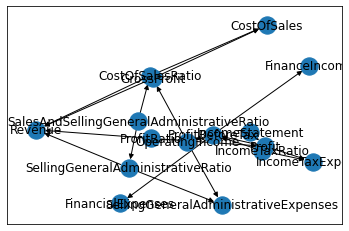

In [7]:
nx_graph = nx.DiGraph(net.get_adj_list())
nx_graph.add_edges_from([(x['from'], x['to'], {'label': x['title']}) for x in net.get_edges()])
nx.draw_networkx(nx_graph, with_labels=True)

In [14]:
bfs_tree = nx.bfs_predecessors(nx_graph, 'CostOfSalesRatio')
dict(bfs_tree)

{'CostOfSales': 'CostOfSalesRatio', 'Revenue': 'CostOfSalesRatio'}

In [13]:
ACC_DICT.keys()

dict_keys(['CurrentAssets', 'CashAndCashEquivalents', 'TradeAndOtherCurrentReceivables', 'PrepaidExpenses', 'Inventories', 'NoncurrentAssets', 'PropertyPlantAndEquipment', 'IntangibleAssets', 'AssetsAbstract', 'CurrentLiabilities', 'TradeAndOtherCurrentPayables', 'ShorttermBorrowings', 'AdvancesCustomers', 'NoncurrentLiabilities', 'BondsIssued', 'LongTermBorrowings', 'LiabilitiesAbstract', 'TotalEquity', 'LiabilitiesAndEquities', 'TradeReceivableTurnoverPeriod', 'PrepaidExpensesTurnoverPeriod', 'InventoriesTurnoverPeriod', 'TradePayablesTurnoverPeriod', 'AdvancesCustomersTurnoverPeriod', 'Revenue', 'CostOfSales', 'GrossProfit', 'SellingGeneralAdministrativeExpenses', 'OperatingIncome', 'FinanceIncome', 'FinancialExpenses', 'ProfitBeforeTax', 'IncomeTaxExpense', 'Profit', 'CostOfSalesRatio', 'SellingGeneralAdministrativeRatio', 'SalesAndSellingGeneralAdministrativeRatio', 'IncomeTaxRatio', 'ProfitRatio', 'IncomeStatement', 'BalanceSheet', 'CalendarOneYear'])

In [20]:
account = 'SalesAndSellingGeneralAdministrativeRatio'
knowledge = 'IS'
key_information = {
    "change_in_context_intent":False,
    "context":"PAST",
    "intent":"value",
    "year":2019,
    "account":"IS.SalesAndSellingGeneralAdministrativeRatio" # CostOfSalesRatio
}
key_information = {
    "change_in_context_intent":False,
    "context":"IF",
    "intent":"account_change",
    "year":2020,
    "account":"IS.OperatingIncome",
    "subject_account": "IS.CostOfSales",
    "subject_apply": ('*', 1.1)
    }
if key_information.get('subject_account'):
    sub_account = {key_information['subject_account'].split('.')[1]: key_information['subject_apply']}
else:
    sub_account = None
knowledge, account = key_information['account'].split('.')
year = key_information.get('year')
quarter = '4Q' if key_information.get('quarter') is None else key_information.get('quarter')
# account = 'Revenue'
bfs_tree = nx.bfs_successors(nx_graph, source=account) #  CostOfSalesRatio
bfs_tree = dict(bfs_tree)

In [185]:
# bfs_tree = nx.bfs_predecessors(nx_graph, source=account)
# dict(bfs_tree)


In [9]:
from psycopg import sql
import yaml
import psycopg
# Load settings
src_path = Path('.').absolute().parent
with (src_path / 'setting_files' / 'settings.yml').open('r') as file:
    settings = yaml.full_load(file)
db_settings = settings['db']

"""
SELECT CAST(A.revenue AS REAL) / CAST(B.cor AS REAL)
FROM (
(SELECT T.value AS revenue FROM vt_is_005930 AS T
WHERE 
    T.bsns_year = '2019' AND 
    T.quarter = '4Q' AND 
    T.account = 'Revenue') AS A
JOIN 
(SELECT T.value AS cor FROM vt_is_005930 AS T
WHERE 
    T.bsns_year = '2019' AND 
    T.quarter = '4Q' AND 
    T.account = 'CostOfSales') AS B ON 1=1
)
"""

# sql.SQL("SELECT {}({}, {}, {}, {}, {}, {}) VALUES (DEFAULT, %s, %s, %s, %s, %s) ;").format(
#     sql.Identifier(f'vt_{knowledge.lower()}_005930'), *list(map(sql.Identifier, tables['income_statement']))
# ),
# tuple([corp] + list(line.values))

"\nSELECT CAST(A.revenue AS REAL) / CAST(B.cor AS REAL)\nFROM (\n(SELECT T.value AS revenue FROM vt_is_005930 AS T\nWHERE \n    T.bsns_year = '2019' AND \n    T.quarter = '4Q' AND \n    T.account = 'Revenue') AS A\nJOIN \n(SELECT T.value AS cor FROM vt_is_005930 AS T\nWHERE \n    T.bsns_year = '2019' AND \n    T.quarter = '4Q' AND \n    T.account = 'CostOfSales') AS B ON 1=1\n)\n"

In [44]:
# base_query = """SELECT T.value AS {} FROM vt_{}_005930 AS T"""
# query_format = sql.SQL(query_base).format(sql.Identifier(child.lower()), sql.Identifier(knowledge.lower()))

In [133]:
# div_query_format = """
# SELECT ({} * CAST(A.{} AS REAL)) / ({} * CAST(B.{} AS REAL))
# FROM (
#     ( {} ) AS A
#     JOIN 
#     ( {} ) AS B ON 1=1
# ) 
# """
# part_query_format = """
# SELECT ({})
# FROM (
#     ( {} ) AS A
#     JOIN 
#     ( {} ) AS B ON 1=1
# ) 
# """
# base_query_format = """SELECT T.value AS {} FROM {} AS T """
# query_format_dict = {
#     'ratio': div_query_format,
#     'value': part_query_format,
#     'base': base_query_format
# }

In [12]:
nodes = set()
for k, v in dict(bfs_tree).items():
    for a in v:
        nodes.add(a)
    nodes.add(k)
nodes = list(map(lambda x: f'acc:{x}', nodes))
nodes

['acc:GrossProfit',
 'acc:CostOfSales',
 'acc:SellingGeneralAdministrativeExpenses',
 'acc:Revenue',
 'acc:OperatingIncome']

In [13]:
# Construct oppsited graph acc:hasPart acc:isDenominatorOf acc:isNumeratorOf
query_statement = """
SELECT ?s ?p ?o WHERE { 
  ?s rdf:type acc:Account .
  VALUES ?o { """ + f'{" ".join(nodes)}' + """ }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
qres = list(map(lambda x: tuple(convert_to_string(acc) for acc in x), list(qres)))

role_dict = defaultdict(list)
for s, p, o in qres:
    if s not in role_dict[o]:
        role_dict[o].append((s, p))

In [14]:
role_dict

defaultdict(list,
            {'GrossProfit': [('CostOfSales', 'partOf'), ('Revenue', 'partOf')],
             'OperatingIncome': [('SellingGeneralAdministrativeExpenses',
               'partOf'),
              ('GrossProfit', 'partOf')]})

In [28]:
with psycopg.connect(
        dbname=db_settings['dbname'],
        host=db_settings['host'],
        user=db_settings['user'], 
        password=db_settings['password'],
        port=db_settings['port']
    ) as conn:
    with conn.cursor() as cur:
        cur.execute(query_dict['CostOfSales']['query'])
        data = cur.fetchall()

data

[(Decimal('158937125600000.0'),)]

In [21]:
sub_account
sql.

{'CostOfSales': ('*', 1.1)}

In [35]:
base_query_format = """SELECT (T.value){} AS {} FROM {} AS T """
# search from top to bottom
query_dict = defaultdict(dict)
for parent, children in role_dict.items():
    # start from account node
    for child, role in children:
        if child not in role_dict:
            # leaf node
            if query_dict[child].get('parents') is None:
                query_dict[child]['parents'] = []

            if child in sub_account:
                apply, apply_number = sub_account[child]
                sub_apply_query = sql.SQL(' ').join([sql.SQL(apply), apply_number])
            else:
                sub_apply_query = sql.SQL('')
            acc_knowledge = ACC_DICT[child]['group'].lower().split('-')[0]
            view_table = f"vt_{acc_knowledge.lower()}_005930"
            select_format = sql.SQL(base_query_format).format(sub_apply_query, sql.Identifier(child.lower()), sql.Identifier(view_table))
            where_format = sql.SQL("""WHERE T.bsns_year = {} AND T.quarter = {} AND T.account = {}""").format(year, quarter, child)
            query = select_format + where_format
            
            query_dict[child]['query'] = query
            query_dict[child]['sign'] = 1.0 if ACC_DICT[child]['Account_Property'].lower() == 'positive' else -1.0
            query_dict[child]['parents'].append((role, parent))
    
query_dict

defaultdict(dict,
            {'CostOfSales': {'parents': [('partOf', 'GrossProfit')],
              'query': Composed([SQL('SELECT (T.value)'), Composed([SQL('*'), SQL(' '), Literal(1.1)]), SQL(' AS '), Identifier('costofsales'), SQL(' FROM '), Identifier('vt_is_005930'), SQL(' AS T '), SQL('WHERE T.bsns_year = '), Literal(2020), SQL(' AND T.quarter = '), Literal('4Q'), SQL(' AND T.account = '), Literal('CostOfSales')]),
              'sign': -1.0},
             'Revenue': {'parents': [('partOf', 'GrossProfit')],
              'query': Composed([SQL('SELECT (T.value)'), SQL(''), SQL(' AS '), Identifier('revenue'), SQL(' FROM '), Identifier('vt_is_005930'), SQL(' AS T '), SQL('WHERE T.bsns_year = '), Literal(2020), SQL(' AND T.quarter = '), Literal('4Q'), SQL(' AND T.account = '), Literal('Revenue')]),
              'sign': 1.0},
             'SellingGeneralAdministrativeExpenses': {'parents': [('partOf',
                'OperatingIncome')],
              'query': Composed([SQL('SELECT

In [36]:
role_dict_sorted = dict(sorted(list(role_dict.items()), key=lambda x: all([acc in list(query_dict.keys()) for acc, role in x[1]]), reverse=True))
role_dict_sorted

{'GrossProfit': [('CostOfSales', 'partOf'), ('Revenue', 'partOf')],
 'OperatingIncome': [('SellingGeneralAdministrativeExpenses', 'partOf'),
  ('GrossProfit', 'partOf')]}

In [37]:
def get_div_query(qs, acc):
    X, Y = qs
    if (X[0] == 'denominator') and (Y[0] == 'numerator'):
        B = X
        A = Y
    elif (Y[0] == 'denominator') and (X[0] == 'numerator'):
        B = Y
        A = X
    A_sign, A_node, A_q = A[1:]
    B_sign, B_node, B_q = B[1:]
    div_query_format = """
    SELECT ({} * CAST(A.{} AS REAL)) / ({} * CAST(B.{} AS REAL)) AS {}
    FROM (
        ( {} ) AS A
        JOIN 
        ( {} ) AS B ON 1=1
    ) 
    """
    div_query = sql.SQL(div_query_format).format(
        abs(A_sign), sql.Identifier(A_node.lower()), abs(B_sign), sql.Identifier(B_node.lower()), sql.Identifier(acc.lower()), A_q, B_q)
    return div_query

def get_partof_query(qs, acc):
    # SELECT
    partof_query = sql.SQL("""SELECT """)
    partof_query += sql.SQL(' + ').join(
        [sql.SQL('({} * CAST({}.{} AS REAL)) ').format(sign, sql.Identifier(f'X{i}'), sql.Identifier(node.lower())) for i, (_, sign, node, _) in enumerate(qs)]
    )
    partof_query += sql.SQL(" AS {}").format(sql.Identifier(acc.lower()))
    # FROM
    partof_query += sql.SQL(" FROM ( ")
    for i, (*_, query) in enumerate(qs):
        partof_query += sql.SQL(f"( ") + query + sql.SQL(" ) AS {}").format(sql.Identifier(f'X{i}'))
        if i == 0:
            partof_query += sql.SQL(" JOIN ")
        elif i == (len(qs)-1):
            partof_query += sql.SQL(" ON 1=1 ")
        else:
            partof_query += sql.SQL(" ON 1=1 JOIN ")
    partof_query += sql.SQL(" )")
    return partof_query

In [38]:
for acc, childrens in role_dict_sorted.items():
    print(acc)
    acc_sign = 1.0 if ACC_DICT[acc]['Account_Property'].lower() == 'positive' else -1.0
    # acc_knowledge, acc_property, _ = ACC_DICT[acc]['group'].lower().split('-')
    qs = []
    for child, role in childrens:
        print(child)
        qs.append(
            (role,
            query_dict[child]['sign'],
            child,
            query_dict[child]['query'])
        )
    if role.lower() != 'partof':
        query_dict[acc]['query'] = get_div_query(qs, acc)
    else:
        query_dict[acc]['query'] = get_partof_query(qs, acc)
    query_dict[acc]['sign'] = acc_sign

GrossProfit
CostOfSales
Revenue
OperatingIncome
SellingGeneralAdministrativeExpenses
GrossProfit


In [39]:
query_dict

defaultdict(dict,
            {'CostOfSales': {'parents': [('partOf', 'GrossProfit')],
              'query': Composed([SQL('SELECT (T.value)'), Composed([SQL('*'), SQL(' '), Literal(1.1)]), SQL(' AS '), Identifier('costofsales'), SQL(' FROM '), Identifier('vt_is_005930'), SQL(' AS T '), SQL('WHERE T.bsns_year = '), Literal(2020), SQL(' AND T.quarter = '), Literal('4Q'), SQL(' AND T.account = '), Literal('CostOfSales')]),
              'sign': -1.0},
             'Revenue': {'parents': [('partOf', 'GrossProfit')],
              'query': Composed([SQL('SELECT (T.value)'), SQL(''), SQL(' AS '), Identifier('revenue'), SQL(' FROM '), Identifier('vt_is_005930'), SQL(' AS T '), SQL('WHERE T.bsns_year = '), Literal(2020), SQL(' AND T.quarter = '), Literal('4Q'), SQL(' AND T.account = '), Literal('Revenue')]),
              'sign': 1.0},
             'SellingGeneralAdministrativeExpenses': {'parents': [('partOf',
                'OperatingIncome')],
              'query': Composed([SQL('SELECT

In [40]:
with psycopg.connect(
        dbname=db_settings['dbname'],
        host=db_settings['host'],
        user=db_settings['user'], 
        password=db_settings['password'],
        port=db_settings['port']
    ) as conn:
    with conn.cursor() as cur:
        # cur.execute(query_dict['SalesAndSellingGeneralAdministrativeRatio']['query'])
        # data = cur.fetchall()
        print(query_dict['OperatingIncome']['query'].as_string(conn))

SELECT ( -1.0 * CAST("X0"."sellinggeneraladministrativeexpenses" AS REAL))  + (1.0 * CAST("X1"."grossprofit" AS REAL))  AS "operatingincome" FROM ( ( SELECT (T.value) AS "sellinggeneraladministrativeexpenses" FROM "vt_is_005930" AS T WHERE T.bsns_year = 2020 AND T.quarter = '4Q' AND T.account = 'SellingGeneralAdministrativeExpenses' ) AS "X0" JOIN ( SELECT ( -1.0 * CAST("X0"."costofsales" AS REAL))  + (1.0 * CAST("X1"."revenue" AS REAL))  AS "grossprofit" FROM ( ( SELECT (T.value)* 1.1 AS "costofsales" FROM "vt_is_005930" AS T WHERE T.bsns_year = 2020 AND T.quarter = '4Q' AND T.account = 'CostOfSales' ) AS "X0" JOIN ( SELECT (T.value) AS "revenue" FROM "vt_is_005930" AS T WHERE T.bsns_year = 2020 AND T.quarter = '4Q' AND T.account = 'Revenue' ) AS "X1" ON 1=1  ) ) AS "X1" ON 1=1  )


In [41]:
with psycopg.connect(
        dbname=db_settings['dbname'],
        host=db_settings['host'],
        user=db_settings['user'], 
        password=db_settings['password'],
        port=db_settings['port']
    ) as conn:
    with conn.cursor() as cur:
        cur.execute(query_dict['OperatingIncome']['query'])
        data = cur.fetchall()
        # print(query_dict['SalesAndSellingGeneralAdministrativeRatio']['query'].as_string(conn))

In [68]:
data

[(35993860177920.0,)]